In [1]:
# %pip install python-dotenv
# %pip install seaborn
# %pip install tensorflow_data_validation


In [2]:
import os
import pandas as pd
import geopandas as gpd
import pygeos as pg
import numpy as np
# import tensorflow as tf
# import tensorflow_data_validation as tfdv
import sklearn as sk
import scipy as sp
import seaborn as sns
# from datetime import datetime
# from dotenv import load_dotenv
from IPython.display import clear_output
from matplotlib import pyplot as plt
from shapely import wkt


f:\Programs\Miniconda3\envs\ml\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Red\AppData\Local\Temp\ipykernel_663372\2532399237.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.i

In [3]:
# The following lines adjust the granularity of reporting.
#pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
os.chdir('F:\\Uni Files\\4710\\4710 Project\\MLweatherForestFire')


In [4]:
def getGPDfromPD(df: pd.DataFrame, geomCol: str, crs: str = "EPSG:3978") -> gpd.GeoDataFrame:
    """
    Convert a pandas dataframe to a geopandas dataframe
    :param df: pandas dataframe
    :param geomCol: name of the geometry column
    :param crs: coordinate reference system
    :return: geopandas dataframe
    """
    if 'geom' in df.columns:
        df.rename(columns={'geom': 'geometry'}, inplace=True)

    df[geomCol] = df[geomCol].apply(wkt.loads)
    gdf = gpd.GeoDataFrame(df, geometry=geomCol, crs=crs)
    return gdf


In [5]:
fireWeatherTable = "Data/FinalFeature.csv"
dfFireWeather = pd.read_csv(fireWeatherTable)


In [6]:
dfEval = dfFireWeather
dfEval.describe()

,ENTRYID,YEAR,MONTH,DAY,SIZE_HA,SIZE_HA_BIN,ELEVATIONM,DIST_TO_WATER,DAYW,MAXTEMP,MEANHUMIDITY,MEANWINDSPEED,MAXWINDSPEED,TOTALPRECIP,LONG,LAT,LONGBIN,LATBIN
count,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0,836.0
mean,1143.2,2009.5,6.4,16.7,10705.3,1.7,742.7,3881.6,15.7,23.1,61.2,8.3,16.2,0.2,5375901.9,2375607.2,365.0,384.7
std,1439.2,5.3,1.1,9.0,29415.9,1.1,513.4,4094.2,9.0,6.4,12.1,3.4,5.9,1.5,139093.0,204885.0,111.1,97.6
min,283.0,2000.0,1.0,2.0,201.8,0.0,225.0,0.0,1.0,-6.2,28.0,2.1,4.0,0.0,4918132.3,1567321.0,0.0,0.0
25%,522.8,2005.0,6.0,8.0,704.4,1.0,434.0,1114.6,7.0,21.1,53.0,5.9,11.0,0.0,5267895.2,2246671.4,278.5,323.0
50%,753.5,2010.0,6.0,17.0,2070.2,2.0,496.0,2467.7,16.0,24.4,61.0,7.5,16.0,0.0,5379082.5,2392909.7,367.5,393.0
75%,1539.2,2015.0,7.0,25.0,7250.0,3.0,1161.0,5318.9,24.0,26.9,68.6,10.2,20.0,0.0,5493470.9,2524069.0,459.0,455.0
max,10650.0,2020.0,10.0,31.0,476376.8,3.0,3668.0,29418.8,30.0,34.9,96.9,30.1,37.0,20.8,5632110.7,2763468.2,569.0,569.0


In [7]:
# log transform SIZE_HA
dfEval['SIZE_HA'] = np.log(dfEval['SIZE_HA'])

# binning SIZE_HA into 4 categories L M H E in SIZE_HA_BIN
dfEval['SIZE_HA_BIN'] = pd.qcut(dfEval['SIZE_HA'], 4, labels=['L', 'M', 'H', 'E'])

# count the number of fires in each SIZE_HA_BIN
dfEval['SIZE_HA_BIN'].value_counts()
dfEval['SIZE_HA_BIN'].astype('category')

0      L
1      L
2      L
3      M
4      L
5      L
6      M
7      L
8      M
9      M
10     H
11     L
12     L
13     M
14     H
15     H
16     E
17     M
18     H
19     H
20     E
21     M
22     E
23     E
24     M
25     L
26     E
27     H
28     H
29     E
30     E
31     L
32     M
33     M
34     M
35     E
36     M
37     M
38     E
39     L
40     E
41     L
42     E
43     M
44     L
45     H
46     E
47     H
48     E
49     H
50     E
51     M
52     M
53     H
54     H
55     M
56     H
57     H
58     H
59     E
60     M
61     M
62     H
63     M
64     E
65     E
66     E
67     M
68     E
69     H
70     E
71     M
72     E
73     H
74     L
75     L
76     E
77     H
78     M
79     E
80     H
81     L
82     H
83     H
84     E
85     M
86     H
87     L
88     E
89     H
90     M
91     L
92     H
93     L
94     M
95     M
96     E
97     L
98     M
99     E
100    E
101    L
102    H
103    M
104    H
105    H
106    L
107    L
108    L
109    M
110    H
1

In [8]:
# print rows with nan
print(dfEval.describe())

       ENTRYID   YEAR  MONTH   DAY  SIZE_HA  ELEVATIONM  DIST_TO_WATER  DAYW  \
count    836.0  836.0  836.0 836.0    836.0       836.0          836.0 836.0   
mean    1143.2 2009.5    6.4  16.7      7.8       742.7         3881.6  15.7   
std     1439.2    5.3    1.1   9.0      1.6       513.4         4094.2   9.0   
min      283.0 2000.0    1.0   2.0      5.3       225.0            0.0   1.0   
25%      522.8 2005.0    6.0   8.0      6.6       434.0         1114.6   7.0   
50%      753.5 2010.0    6.0  17.0      7.6       496.0         2467.7  16.0   
75%     1539.2 2015.0    7.0  25.0      8.9      1161.0         5318.9  24.0   
max    10650.0 2020.0   10.0  31.0     13.1      3668.0        29418.8  30.0   

       MAXTEMP  MEANHUMIDITY  MEANWINDSPEED  MAXWINDSPEED  TOTALPRECIP  \
count    836.0         836.0          836.0         836.0        836.0   
mean      23.1          61.2            8.3          16.2          0.2   
std        6.4          12.1            3.4           5.9

In [9]:
# Store our random selection, run once
# randomTrain = "RandomTrain"
# dfTrain.to_sql(randomTrain, db_push_con, if_exists='replace', index=False)

# randomTest = "RandomTest"
# dfTest.to_sql(randomTest, db_push_con, if_exists='replace', index=False)

# randomValidate = "RandomValidate"
# dfValidate.to_sql(randomValidate, db_push_con, if_exists='replace', index=False)


In [10]:
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelBinarizer

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import classification_report
# from sklearn.inspection import DecisionBoundaryDisplay


In [11]:
dfEval.columns


Index(['ENTRYID', 'FIRE_ID', 'FIRENAME', 'YEAR', 'MONTH', 'DAY', 'REP_DATE',
       'SIZE_HA', 'SIZE_HA_BIN', 'GEOM', 'ELEVATIONM', 'DIST_TO_WATER',
       'CLIMATEID', 'PROVINCECODE', 'DAYW', 'MAXTEMP', 'MEANHUMIDITY',
       'MEANWINDSPEED', 'MAXWINDSPEED', 'TOTALPRECIP', 'RAIN', 'LONG', 'LAT',
       'LONGBIN', 'LATBIN'],
      dtype='object')

In [12]:
# sum of size_ha column
dfEval['SIZE_HA'].sum()

6551.109478673032

In [13]:
dfTrim = dfEval.copy(deep=True)

# edit this
dfTrim = dfTrim.drop(columns={'ENTRYID', 'FIRE_ID', 'FIRENAME', 'GEOM', 'CLIMATEID', 'PROVINCECODE',
                              'TOTALPRECIP', 'LONG', 'LAT', 'REP_DATE', 'SIZE_HA'})


In [14]:
# replace size_ha_bin 0 1 2 3 with L M H E

# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('0', 'L')
# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('1', 'M')
# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('2', 'H')
# dfTrim['SIZE_HA_BIN'] = dfTrim['SIZE_HA_BIN'].astype(str).replace('3', 'E')


In [15]:
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
         2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
trainYears = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
testYears = [2017, 2018, 2019, 2020, 2021, 2022]
dfTrain = dfTrim[dfTrim['YEAR'].isin(trainYears)].drop(columns={'SIZE_HA_BIN'})
dfTest = dfTrim[dfTrim['YEAR'].isin(testYears)].drop(columns={'SIZE_HA_BIN'})


In [16]:
def scaleData(df: pd.DataFrame) -> pd.DataFrame:
    mean = df.mean()
    std = df.std()
    # regularize y values using z score
    df = (df - mean) / std
    # set max value to 3 zscore
    df[df > 3] = 3
    # set min value to -3 zscore
    df[df < -3] = -3

    # shift the wole train set to be positive
    # df = df + 3

    # return dataframe list of means and stds
    return df, mean, std


In [17]:
dfTrainScaled, dfMeans, dfStdevs = scaleData(dfTrain.copy(deep=True))
dfTrainScaled['YEAR'] = dfTrain['YEAR']
dfTrainScaled['SIZE_HA_BIN'] = dfTrim[dfTrim['YEAR'].isin(trainYears)]['SIZE_HA_BIN']


In [18]:

print(dfTrainScaled.count())
print(dfTrainScaled.isna().sum().sum())
print(dfTrainScaled.dtypes)


YEAR             754
MONTH            754
DAY              754
ELEVATIONM       754
DIST_TO_WATER    754
DAYW             754
MAXTEMP          754
MEANHUMIDITY     754
MEANWINDSPEED    754
MAXWINDSPEED     754
RAIN             754
LONGBIN          754
LATBIN           754
SIZE_HA_BIN      754
dtype: int64
0
YEAR                int64
MONTH             float64
DAY               float64
ELEVATIONM        float64
DIST_TO_WATER     float64
DAYW              float64
MAXTEMP           float64
MEANHUMIDITY      float64
MEANWINDSPEED     float64
MAXWINDSPEED      float64
RAIN              float64
LONGBIN           float64
LATBIN            float64
SIZE_HA_BIN      category
dtype: object


In [19]:
print(dfTrainScaled.describe())


        YEAR  MONTH   DAY  ELEVATIONM  DIST_TO_WATER  DAYW  MAXTEMP  \
count  754.0  754.0 754.0       754.0          754.0 754.0    754.0   
mean  2008.6    0.0  -0.0        -0.0           -0.0  -0.0      0.0   
std      4.8    0.9   1.0         1.0            0.9   1.0      0.9   
min   2000.0   -3.0  -1.6        -1.0           -1.0  -1.6     -3.0   
25%   2005.0   -0.3  -1.0        -0.6           -0.7  -1.0     -0.3   
50%   2009.0   -0.3   0.0        -0.5           -0.3   0.0      0.2   
75%   2013.0    0.6   0.9         0.8            0.3   0.9      0.6   
max   2016.0    3.0   1.6         3.0            3.0   1.6      1.8   

       MEANHUMIDITY  MEANWINDSPEED  MAXWINDSPEED  RAIN  LONGBIN  LATBIN  
count         754.0          754.0         754.0 754.0    754.0   754.0  
mean            0.0           -0.0          -0.0  -0.0     -0.0     0.0  
std             1.0            1.0           1.0   0.9      1.0     1.0  
min            -2.7           -1.9          -2.0  -0.3     -2.9 

In [20]:
C = 1  # SVM regularization parameter

model02 = svm.SVC(kernel="linear", C=C, decision_function_shape='ovo', probability=True)
model01 = svm.LinearSVC(C=C, max_iter=10000)
model03 = svm.SVC(kernel="rbf", gamma=0.7, C=C, decision_function_shape='ovo', probability=True)
model04 = svm.SVC(kernel="poly", degree=3, gamma="scale",
                 C=C, decision_function_shape='ovo', probability=True)
model05 = svm.SVC(kernel="sigmoid", gamma="scale", C=C, decision_function_shape='ovo', probability=True)


# random forest
model07 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model06 = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
model08 = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=0)
model09 = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=0)

# svr models 
model10 = svm.SVR(kernel="linear", C=C)
model11 = svm.SVR(kernel="rbf", gamma=0.7, C=C)
model12 = svm.SVR(kernel="poly", degree=3, gamma="auto", C=C)
model13 = svm.SVR(kernel="sigmoid", gamma="auto", C=C)


In [21]:

excludeList = ['SIZE_HA_BIN', 'YEAR', 'DAY', 'DAYW']
dfFeatures = dfTrainScaled.drop(excludeList, axis=1)
dfLabel = dfTrainScaled['SIZE_HA_BIN']
# dfLabelR = dfEval[dfEval['YEAR'].isin(testYears)]['SIZE_HA']


In [22]:

model01 = model01.fit(dfFeatures, dfLabel)
model02 = model02.fit(dfFeatures, dfLabel)
model03 = model03.fit(dfFeatures, dfLabel)
model04 = model04.fit(dfFeatures, dfLabel)
model05 = model05.fit(dfFeatures, dfLabel)
model06 = model06.fit(dfFeatures, dfLabel)
model07 = model07.fit(dfFeatures, dfLabel)
model08 = model08.fit(dfFeatures, dfLabel)
model09 = model09.fit(dfFeatures, dfLabel)


# model10 = model10.fit(dfFeatures, dfLabelR)
# model11 = model11.fit(dfFeatures, dfLabelR)
# model12 = model12.fit(dfFeatures, dfLabelR)
# model13 = model13.fit(dfFeatures, dfLabelR)


In [23]:
dfMeans.describe()

count     13.0
mean     584.8
std     1157.1
min        0.1
25%       15.8
50%       23.0
75%      383.0
max     3954.2
dtype: float64

In [24]:
dfTestScaled = pd.DataFrame()
for colNum in range(0, len(dfTest.columns)):
    dfTestScaled[dfTest.columns[colNum]] = (dfTest[dfTest.columns[colNum]] - dfMeans[colNum]) / dfStdevs[colNum]
    # dfTestScaled = (dfTest - dfMeans) / dfStdevs

# shift the wole test set to be positive
# dfTestScaled = dfTestScaled + 3

# add year column back
dfTestScaled['YEAR'] = dfTest['YEAR']
dfTestScaled['SIZE_HA_BIN'] = dfTrim[dfTrim['YEAR'].isin(testYears)]['SIZE_HA_BIN']


In [25]:
print(dfTestScaled.describe())

        YEAR  MONTH  DAY  ELEVATIONM  DIST_TO_WATER  DAYW  MAXTEMP  \
count   82.0   82.0 82.0        82.0           82.0  82.0     82.0   
mean  2017.7    0.7 -0.1        -0.1           -0.2  -0.1      0.2   
std      0.9    1.0  0.9         1.0            0.8   0.9      0.7   
min   2017.0   -2.2 -1.5        -0.9           -1.0  -1.5     -1.9   
25%   2017.0    0.6 -0.7        -0.7           -0.7  -0.7      0.0   
50%   2017.0    0.6  0.1        -0.5           -0.5   0.1      0.3   
75%   2018.0    1.5  0.7        -0.3            0.3   0.7      0.6   
max   2020.0    3.4  1.6         5.7            3.0   1.6      1.3   

       MEANHUMIDITY  MEANWINDSPEED  MAXWINDSPEED  RAIN  LONGBIN  LATBIN  
count          82.0           82.0          82.0  82.0     82.0    82.0  
mean            0.1           -0.5          -0.7   0.3      0.3     0.2  
std             0.8            1.0           1.0   1.3      1.1     1.2  
min            -2.3           -1.9          -2.2  -0.3     -3.3    -3.3  

In [26]:
dfTestFeatures = dfTestScaled.drop(excludeList, axis=1)

# predict on test data
dfTestScaled['PREDICTED_SIZE_HA_BIN1'] = model01.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN2'] = model02.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN3'] = model03.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN4'] = model04.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN5'] = model05.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN6'] = model06.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN7'] = model07.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN8'] = model08.predict(dfTestFeatures)
dfTestScaled['PREDICTED_SIZE_HA_BIN9'] = model09.predict(dfTestFeatures)


In [27]:
# show roc curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [28]:
# show precision recall curve
def plot_precision_recall_curve(precision, recall, label=None):
    plt.plot(recall, precision, linewidth=2, label=label)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')


In [29]:
# show accuracy, precision, recall, f1 score
def show_metrics(y_test, y_pred):
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred, average='macro'))
    print("Recall: ", recall_score(y_test, y_pred, average='macro'))
    print("F1Score: ", f1_score(y_test, y_pred, average='macro'))
    # print("AUC: ", roc_auc_score(y_test, y_pred, average='macro'))


In [30]:
def get_all_roc_coordinates(classes, probs):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(classes)):
        fpr[i], tpr[i], _ = roc_curve(classes[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

In [31]:
label_binarizer = LabelBinarizer().fit(dfLabel)
y_onehot_test = label_binarizer.transform(dfTestScaled['SIZE_HA_BIN'])


In [32]:
label_binarizer.transform(["E"])

array([[1, 0, 0, 0]])

In [33]:
class_of_interest = "H"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

1

In [34]:

modelNames = ['SVM Linear SVC','SVM Linear',  'SVM RBF', 'SVM Poly', 'SVM Sigmoid', 'Random Forest 20', 'Random Forest 2', 'Random Forest 50', 'Random Forest 100']


In [35]:
modelList = [model01, model02, model03, model04, model05, model06, model07, model08, model09]

In [36]:

def plotModelTogether(df, class_of_interest):
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    
    fig, ax = plt.subplots( figsize=(20, 10) )
    # ax = fig.add_subplot(111, aspect='equal')

    # scatter plot
    for i in range(2, 7):
        currModel = modelList[i-1]
        try:
            y_score = currModel.decision_function(df)
        except:
            y_score = currModel.predict_proba(df)
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"{class_of_interest} vs the rest {modelNames[i-1]}",
            ax=ax,
        )

    ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    ax.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("One-vs-Rest ROC curves:\n")
    ax.legend()
    plt.show()


In [37]:
labels = ['L', 'M', 'H', 'E']
# show metrics for each model
for i in range(1, 10):
    print("Model ", modelNames[i-1])
    print("Model ", i)
    show_metrics(dfTestScaled['SIZE_HA_BIN'],
                 dfTestScaled['PREDICTED_SIZE_HA_BIN' + str(i)])


Model  SVM Linear SVC
Model  1
Accuracy:  0.24390243902439024
Precision:  0.23194444444444445
Recall:  0.24345238095238095
F1Score:  0.2202167803460907
Model  SVM Linear
Model  2
Accuracy:  0.24390243902439024
Precision:  0.2398989898989899
Recall:  0.24875541125541126
F1Score:  0.22556500465983226
Model  SVM RBF
Model  3
Accuracy:  0.1951219512195122
Precision:  0.15393217893217892
Recall:  0.1754599567099567
F1Score:  0.1616441468136383
Model  SVM Poly
Model  4
Accuracy:  0.18292682926829268
Precision:  0.175
Recall:  0.1807900432900433
F1Score:  0.16864263320504355
Model  SVM Sigmoid
Model  5
Accuracy:  0.35365853658536583
Precision:  0.3644255050505051
Recall:  0.34870129870129873
F1Score:  0.32719491176621907
Model  Random Forest 20
Model  6
Accuracy:  0.2073170731707317
Precision:  0.19783653846153848
Recall:  0.19878246753246753
F1Score:  0.1967540079242207
Model  Random Forest 2
Model  7
Accuracy:  0.25609756097560976
Precision:  0.24576149425287358
Recall:  0.26799242424242425

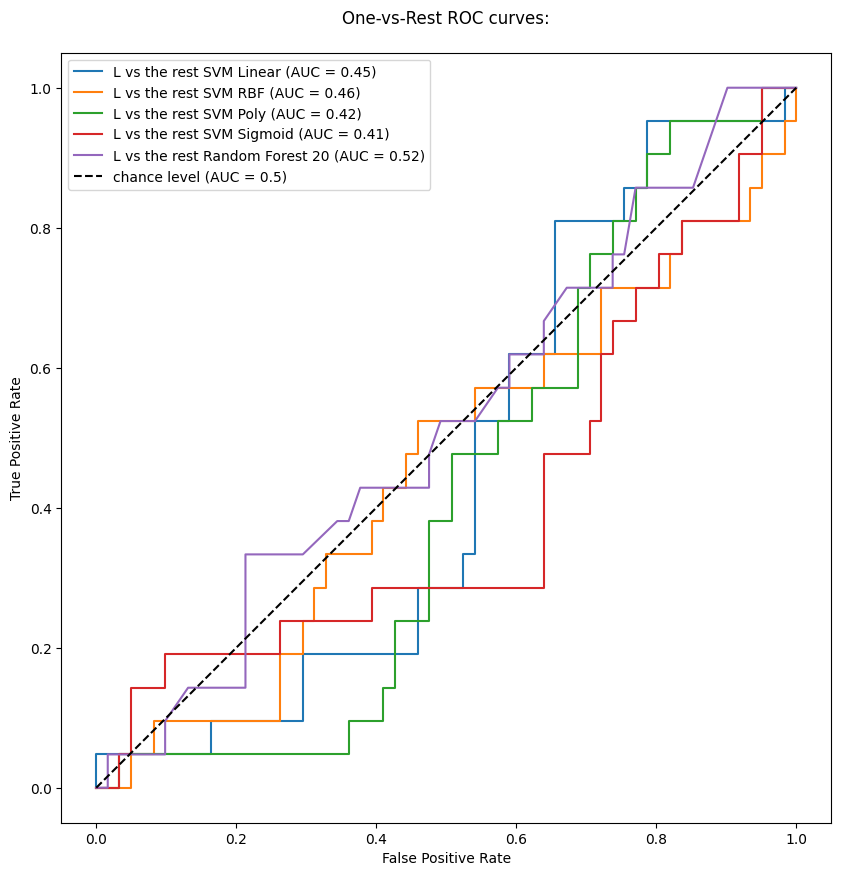

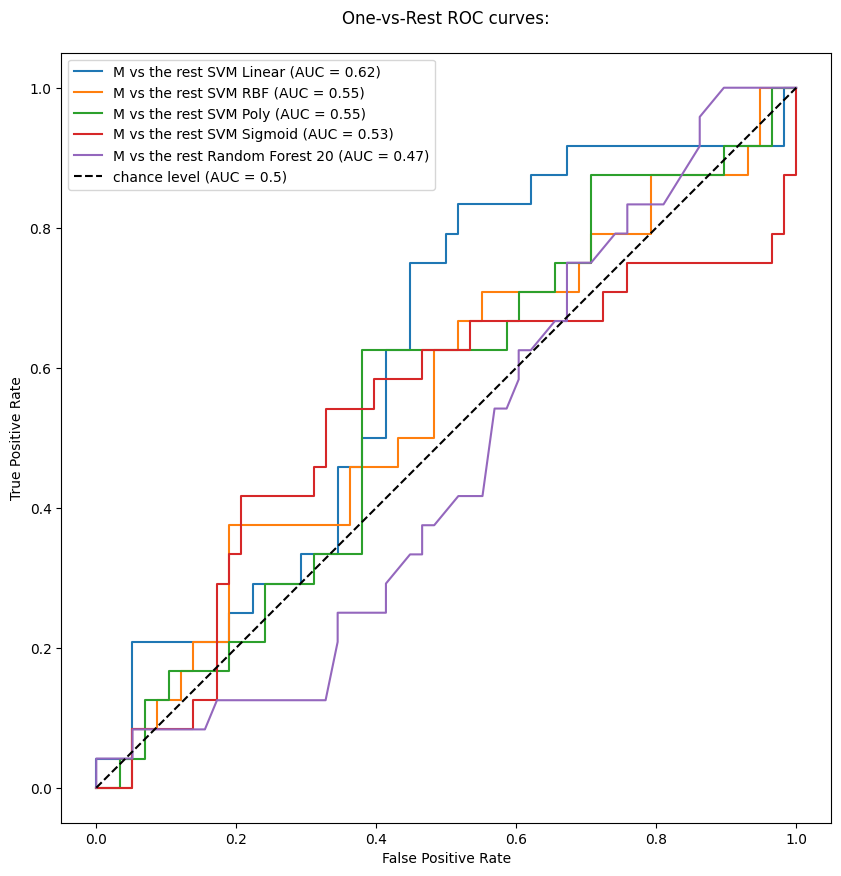

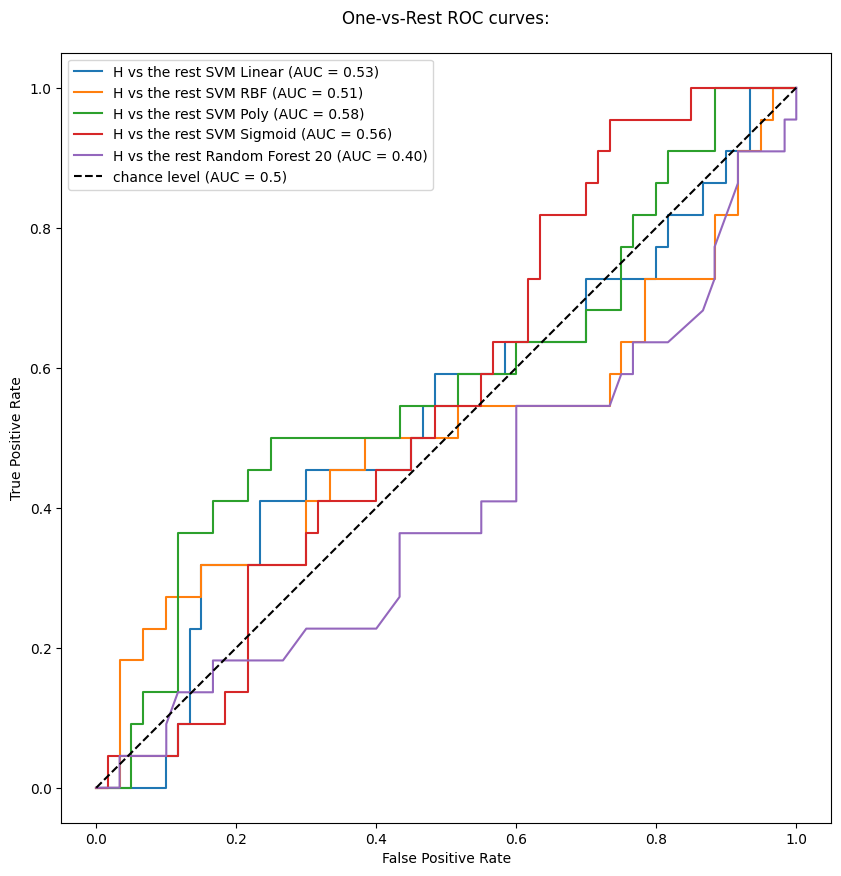

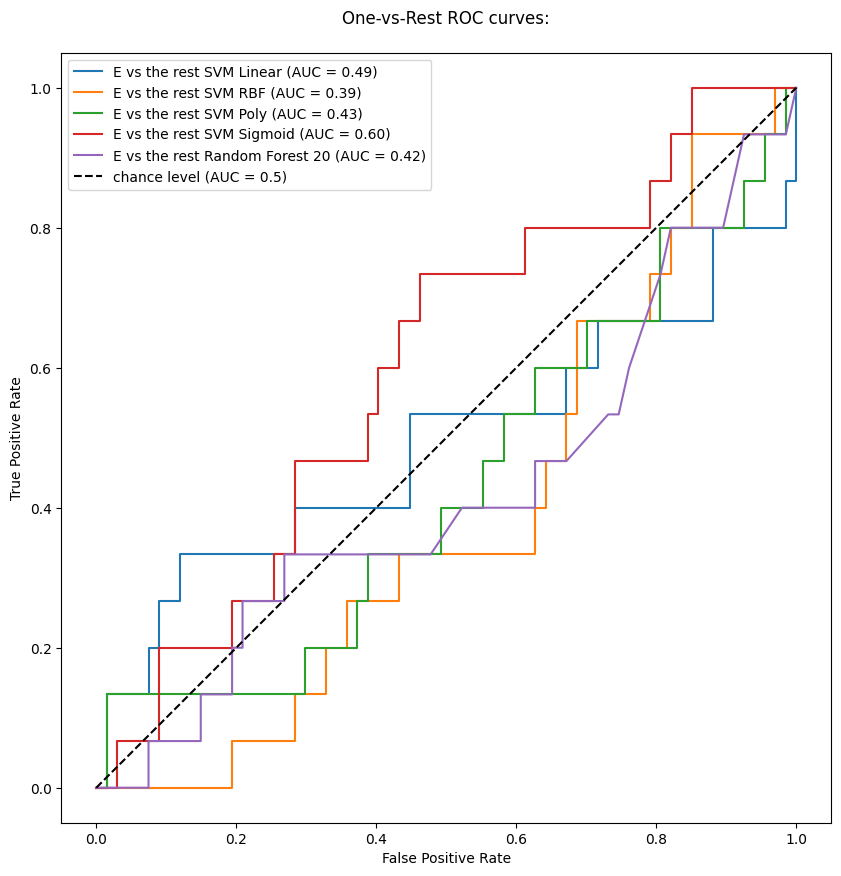

In [38]:
for label in labels:
    plotModelTogether(dfTestFeatures, label)

In [39]:
dfTestScaled.to_csv('test_prevday.csv', index=False)

import tensorflow as tf

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds a randomly-initialized model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the following headline to see the code that builds and trains a model.

#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

## Define plotting functions

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) functions create the following plots:

*  a scatter plot of the feature vs. the label, and a line showing the output of the trained model
*  a loss curve

You may optionally double-click the headline to see the matplotlib code, but note that writing matplotlib code is not an important part of learning ML programming.

#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = dfTrainScaled.sample(n=dfTrainScaled.shape[0])
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 6
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

## Call the model functions

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use `total_rooms` as that feature. 


# The following variables are the hyperparameters.
learning_rate = 0.02
epochs = 30
batch_size = 3

# Specify the feature and the label.
my_feature = "28daySumMaxTemp"  # the total number of rooms on a specific city block.
my_label="SIZE_HA" # the median value of a house on a specific city block.
#my_label="size_ha_bin"
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, dfTrainScaled, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Use the model to make predictions

You can use the trained model to make predictions. In practice, [you should make predictions on examples that are not used in training](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). However, for this exercise, you'll just work with a subset of the same training dataset. A later Colab exercise will explore ways to make predictions on examples not used in training.

First, run the following code to define the house prediction function:

def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = dfTrainScaled[feature][200:200 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (dfTrain[feature][400+i], dfTrain[label][400+i], predicted_values[i][0] ))

predict_house_values(10, my_feature, my_label)

# create nn model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

# train model
model.fit(dfFeatures, dfLabel, epochs=100)



# predict on test data  
dfTestScaled['PREDICTED_SIZE_HA_BIN10'] = model.predict_classes(dfTestFeatures)

# show metrics for each model
print("Model 10")
show_metrics(dfTestScaled['SIZE_HA_BIN'], dfTestScaled['PREDICTED_SIZE_HA_BIN10'])